<a href="https://colab.research.google.com/github/everestso/Fall2021/blob/main/c165f21Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("TitanicTrain.csv")

print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   N

In [10]:
# check missing values in train data
print("Missing Values: ")
print(train_df.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


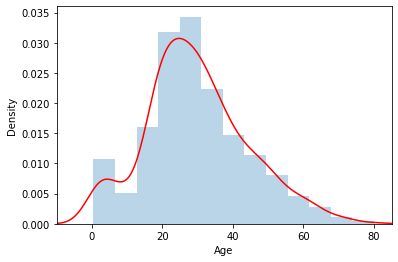

In [33]:
#ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = train_df["Age"].hist(bins=13, density=True, alpha=0.3)
train_df["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

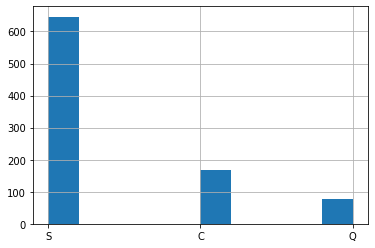

In [41]:
train_df['Embarked'].hist()
plt.show()

In [47]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

training=pd.get_dummies(train_data, columns=["Embarked"])
training.drop(columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print(training.info())
print(training.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   Embarked_C  891 non-null    uint8  
 2   Embarked_Q  891 non-null    uint8  
 3   Embarked_S  891 non-null    uint8  
dtypes: float64(1), uint8(3)
memory usage: 9.7 KB
None
    Age  Embarked_C  Embarked_Q  Embarked_S
0  22.0           0           0           1
1  38.0           1           0           0
2  26.0           0           0           1
3  35.0           0           0           1
4  35.0           0           0           1


In [49]:
clf1 = LogisticRegression(solver='lbfgs',
                        max_iter=10000)
clf1.fit(training, train_df['Survived'] )
clf1.predict()

LogisticRegression(max_iter=10000)

In [51]:
predict = clf1.predict(training)
print("Accuracy = ", accuracy_score(predict, train_df['Survived']))

Accuracy =  0.6341189674523008


In [56]:
TitanicTest = pd.read_csv('TitanicTest.csv')


In [60]:
test_data = TitanicTest.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
testing=pd.get_dummies(test_data, columns=["Embarked"])
testing.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print(testing.info())
print(testing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Embarked_C  418 non-null    uint8  
 2   Embarked_Q  418 non-null    uint8  
 3   Embarked_S  418 non-null    uint8  
dtypes: float64(1), uint8(3)
memory usage: 4.6 KB
None
    Age  Embarked_C  Embarked_Q  Embarked_S
0  34.5           0           1           0
1  47.0           0           0           1
2  62.0           0           1           0
3  27.0           0           0           1
4  22.0           0           0           1


In [61]:
predict = clf1.predict(testing)

In [64]:
TitanicTest['Survived']=predict

TitanicTest[['PassengerId','Survived']].to_csv('Titanic2.csv', index=False, header=True)